In [164]:
# STEP 1 + 3:
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [139]:
# STEP 2:
from google.colab import files
upload = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations (1).csv


In [147]:
# STEP 4:
excel_data = pd.read_csv("Hotel Reservations.csv")
excel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [148]:
# STEP 5:
excel_data.drop("Booking_ID", axis = 1, inplace = True)
excel_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [149]:
excel_data.info()
# obj: type_of_meal_plan, market_segment_type, booking_status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          30000 non-null  int64  
 1   no_of_children                        30000 non-null  int64  
 2   no_of_weekend_nights                  30000 non-null  int64  
 3   no_of_week_nights                     30000 non-null  int64  
 4   type_of_meal_plan                     30000 non-null  object 
 5   required_car_parking_space            30000 non-null  int64  
 6   lead_time                             30000 non-null  int64  
 7   arrival_year                          30000 non-null  int64  
 8   arrival_month                         30000 non-null  int64  
 9   arrival_date                          30000 non-null  int64  
 10  market_segment_type                   30000 non-null  object 
 11  repeated_guest 

In [152]:
print(excel_data["type_of_meal_plan"].value_counts())
print(excel_data["market_segment_type"].unique())

Meal Plan 1     22989
Not Selected     4261
Meal Plan 2      2745
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [153]:
print(excel_data["market_segment_type"].value_counts())
print(excel_data["market_segment_type"].unique())

Online           19320
Offline           8587
Corporate         1658
Complementary      328
Aviation           107
Name: market_segment_type, dtype: int64
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [154]:
print(excel_data["booking_status"].value_counts())
print(excel_data["booking_status"].unique())

Not_Canceled    20185
Canceled         9815
Name: booking_status, dtype: int64
['Not_Canceled' 'Canceled']


In [ ]:
colms = excel_data.columns
print(colms)

In [ ]:
for colm in colms:
  print(excel_data[colm].value_counts())

In [166]:
# STEP 6:
mode = excel_data["type_of_meal_plan"].mode()[0]
excel_data["type_of_meal_plan"].replace("Not Selected", mode, inplace = True)

In [167]:
print(excel_data["type_of_meal_plan"].unique())
print(excel_data["market_segment_type"].unique())

['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [168]:
# STEP 7:

# columns that need encoding:
# 1. type_of_meal_plan
# 2. market_segment_type

encoder = OneHotEncoder(categories=[['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'],
                                    ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']])

new_colms = ['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']

encoded_df = pd.DataFrame(encoder.fit_transform(excel_data[["type_of_meal_plan", "market_segment_type"]]).toarray())
encoded_df.columns = new_colms
hotel_data = excel_data.join(encoded_df)
hotel_data.drop(["type_of_meal_plan", "market_segment_type"], axis = 1, inplace = True)
hotel_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,no_of_special_requests,booking_status,Meal Plan 1,Meal Plan 2,Meal Plan 3,Offline,Online,Corporate,Aviation,Complementary
0,2,0,1,2,0,224,2017,10,2,0,...,0,Not_Canceled,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,1,Not_Canceled,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,2,1,0,1,2018,2,28,0,...,0,Canceled,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,0,0,2,0,211,2018,5,20,0,...,0,Canceled,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,0,1,1,0,48,2018,4,11,0,...,0,Canceled,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [171]:
# STEP 8:
x_data = hotel_data.drop('booking_status', axis = 1)
y_data = hotel_data['booking_status']

In [172]:
# STEP 9:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
# STEP 10:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [ ]:
# STEP 11:

In [175]:
#1: LOG_REG:
# GRID SEARCH:
log_dict = {'max_iter': [500, 1000, 1500]}
log_grid = GridSearchCV(LogisticRegression(), log_dict, cv = 10)
log_grid.fit(x_train, y_train)
log_grid.best_params_

{'max_iter': 500}

In [177]:
log_grid.best_score_

0.8045

In [178]:
#1: LOG_REG:
# BUILDING MODEL:
log_model = LogisticRegression(max_iter= 500)
log_model.fit(x_train, y_train)
log_y_pred = log_model.predict(x_test)
print("Log Reg Accuracy =", accuracy_score(y_test, log_y_pred))

Log Reg Accuracy = 0.8055


In [179]:
#2: KNN:
# GRID SEARCH:
knn_dict = {'n_neighbors': [1, 3, 6, 8, 10, 15]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_dict, cv = 10)
knn_grid.fit(x_train, y_train)
knn_grid.best_params_

{'n_neighbors': 3}

In [182]:
knn_grid.best_score_

0.8470833333333333

In [183]:
#2: KNN:
# BUILDING MODEL:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
print("KNN Accuracy =", accuracy_score(y_test, knn_y_pred))

KNN Accuracy = 0.854


In [187]:
#3: DT:
# GRID SEARCH:
dt_dict = {'criterion': ['entropy', 'gini'], 'max_depth': [4, 6, 7, 9, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_dict, cv = 10)
dt_grid.fit(x_train, y_train)
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [219]:
dt_grid.best_score_

0.8696250000000001

In [221]:
#3: DT:
# BUILDING MODEL:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
print("Decision Tree Accuracy =", accuracy_score(y_test, dt_y_pred))

Decision Tree Accuracy = 0.8713333333333333


In [224]:
#4: RF:
# GRID SEARCH:
rf_dict = {'criterion': ['entropy', 'gini'], 'max_depth': [4, 6], 'n_estimators': [50, 100]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state = 42), rf_dict, cv = 10)
rf_grid.fit(x_train, y_train)
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

In [226]:
rf_grid.best_score_

0.8342083333333333

In [227]:
#4: RF:
# BUILDING MODEL:
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 6, n_estimators = 100, random_state = 42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
print("Random Forest Accuracy =", accuracy_score(y_test, rf_y_pred))

Random Forest Accuracy = 0.8333333333333334


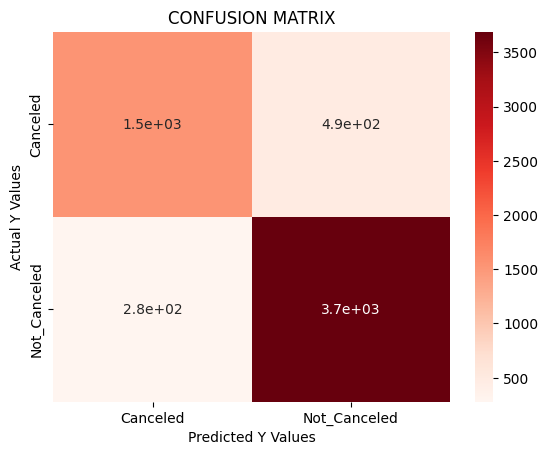

[[1540  492]
 [ 280 3688]]


In [229]:
# STEP 14:
# CONFUSION MATRIX:
label = ['Canceled', 'Not_Canceled']
conf_mat = confusion_matrix(y_test, dt_y_pred, labels = label)
sns.heatmap(conf_mat, annot = True, xticklabels = label, yticklabels = label, cmap = "Reds")
plt.title("CONFUSION MATRIX")
plt.ylabel("Actual Y Values")
plt.xlabel("Predicted Y Values")
plt.show()
print(conf_mat)

In [230]:
# STEP 15:

print(classification_report(y_test, dt_y_pred, target_names = label))

              precision    recall  f1-score   support

    Canceled       0.85      0.76      0.80      2032
Not_Canceled       0.88      0.93      0.91      3968

    accuracy                           0.87      6000
   macro avg       0.86      0.84      0.85      6000
weighted avg       0.87      0.87      0.87      6000



In [211]:
from google.colab import files
upload = files.upload()

Saving Hotel_Test.csv to Hotel_Test (2).csv


In [212]:
excel_test_data = pd.read_csv("Hotel_Test.csv")
excel_test_data.columns = x_data.columns

In [213]:
testing_model = dt_model.predict(excel_test_data.head())
print(testing_model)

['Canceled' 'Not_Canceled' 'Not_Canceled' 'Canceled' 'Not_Canceled']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
